In [2]:
pip install matplotlib

     ---------------------------------------- 8.1/8.1 MB 2.3 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 2.3 MB/s eta 0:00:00
     ---------------------------------------- 2.7/2.7 MB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 71.9/71.9 kB 1.3 MB/s eta 0:00:00
     -------------------------------------- 221.2/221.2 kB 1.2 MB/s eta 0:00:00
     -------------------------------------- 111.1/111.1 kB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install scipy


     -------------------------------------- 41.3/41.3 MB 204.9 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


In [ ]:
#(1)
# 參數設定
S = 90  # 標的資產價格
K = 100  # 履約價
r = 0.01  # 無風險利率
sigma = 0.3  # 波動率

# 指定的5種到期日
T_values = [1, 0.9, 0.5, 0.3, 0.1]

print("不同到期日下的買權價格計算：")
print("-" * 50)
print("到期日(T)\t買權價格(Call)")
print("-" * 50)

# 計算每個到期日的買權價格
for T in T_values:
    # 計算d1
    d1 = (np.log(S/K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    
    # 計算d2
    d2 = d1 - sigma * np.sqrt(T)
    
    # 計算買權價格
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    
    # 輸出結果
    print(f"{T:.1f}\t\t{call_price:.4f}")

print("-" * 50)


不同到期日下的買權價格計算：
--------------------------------------------------
到期日(T)	買權價格(Call)
--------------------------------------------------
1.0		7.3253
0.9		6.7502
0.5		4.1281
0.3		2.5242
0.1		0.6167
--------------------------------------------------


C:\Users\Hayden Chen\AppData\Local\Temp\ipykernel_55684\2509453184.py:43: UserWarning: Glyph 21040 (\N{CJK UNIFIED IDEOGRAPH-5230}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Hayden Chen\AppData\Local\Temp\ipykernel_55684\2509453184.py:43: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Hayden Chen\AppData\Local\Temp\ipykernel_55684\2509453184.py:43: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Hayden Chen\AppData\Local\Temp\ipykernel_55684\2509453184.py:43: UserWarning: Glyph 36023 (\N{CJK UNIFIED IDEOGRAPH-8CB7}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Hayden Chen\AppData\Local\Temp\ipykernel_55684\2509453184.py:43: UserWarning: Glyph 27402 (\N{CJK UNIFIED IDEOGRAPH-6B0A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Hayden Chen\AppData\Local\Temp\ipykernel_55684\250945318

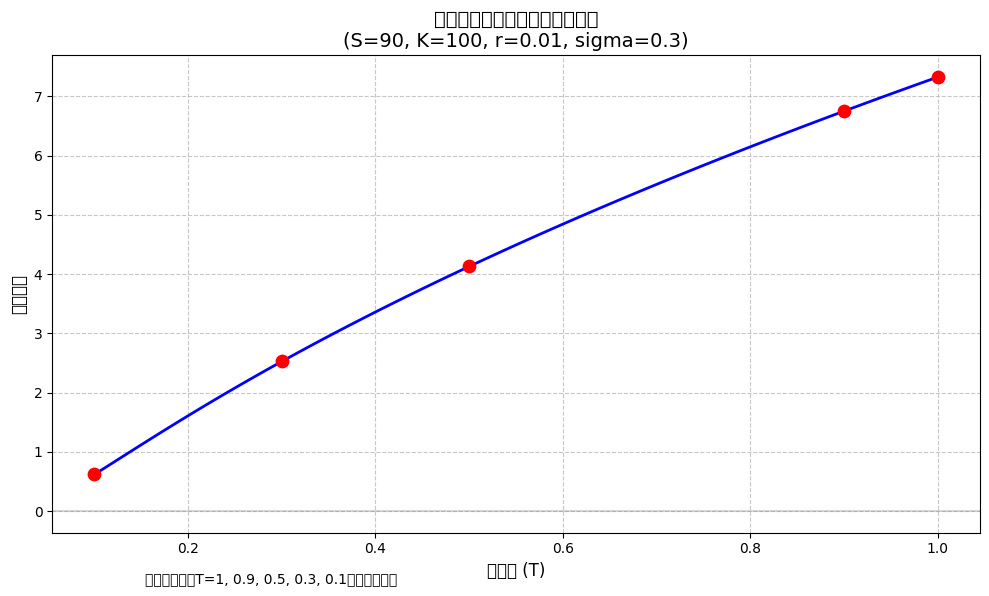

In [8]:
#(2)
# 參數設定 (與前相同)
S = 90  # 標的資產價格
K = 100  # 履約價
r = 0.01  # 無風險利率
sigma = 0.3  # 波動率

# 創建到期日T的範圍
T_range = np.linspace(0.1, 1, 100)  # 從0.1到1，產生100個點
call_prices = []

# 使用迴圈計算每個到期日的買權價格
for T in T_range:
    # 計算d1
    d1 = (np.log(S/K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    
    # 計算d2
    d2 = d1 - sigma * np.sqrt(T)
    
    # 計算買權價格
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    
    # 儲存結果
    call_prices.append(call_price)

# 繪製圖形
plt.figure(figsize=(10, 6))
plt.plot(T_range, call_prices, 'b-', linewidth=2)
plt.scatter(T_values, [S * norm.cdf((np.log(S/K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))) - 
                      K * np.exp(-r * T) * norm.cdf((np.log(S/K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T)) - sigma * np.sqrt(T)) 
                      for T in T_values], 
           color='red', s=80, zorder=5)

plt.xlabel('到期日 (T)', fontsize=12)
plt.ylabel('買權價格', fontsize=12)
plt.title('不同到期日對應的歐式買權價格\n(S=90, K=100, r=0.01, sigma=0.3)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(y=0, color='gray', linestyle='-', alpha=0.3)

# 添加說明文字
plt.figtext(0.15, 0.02, '註：紅點表示T=1, 0.9, 0.5, 0.3, 0.1時的買權價格', fontsize=10)

plt.tight_layout()
plt.show()
